In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# Load dataset

flags_dir: str = "../datasets/flags/"
flags_path: str = os.path.abspath(os.path.join(flags_dir, "flag.data"))

religions: dict = {0: "Catholic", 1: "Other Christian", 2: "Muslim", 3: "Buddhist", 4: "Hindu", 5: "Ethnic", 6: "Marxist", 7: "Others"}
languages: dict = {1: "English", 2: "Spanish", 3: "French", 4: "German", 5: "Slavic", 6: "Other Indo-European", 7: "Chinese", 8: "Arabic", 9: "Japanese/Turkish/Finnish/Magyar", 10: "Others"}

columns: list = [
    "name",
    "landmass",
    "zone",
    "area",
    "population",
    "language",
    "religion",
    "bars",
    "stripes",
    "colours",
    "red",
    "green",
    "blue",
    "gold",
    "white",
    "black",
    "orange",
    "mainhue",
    "circles",
    "crosses",
    "saltires",
    "quarters",
    "sunstars",
    "crescent",
    "triangle",
    "icon",
    "animate",
    "text",
    "topleft",
    "botright",
]

flags_raw_df = pd.read_csv(flags_path, sep=",", header=None, names=columns)
flags_raw_df

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,blue,red
190,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,blue,red
191,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,green,green
192,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,green,brown


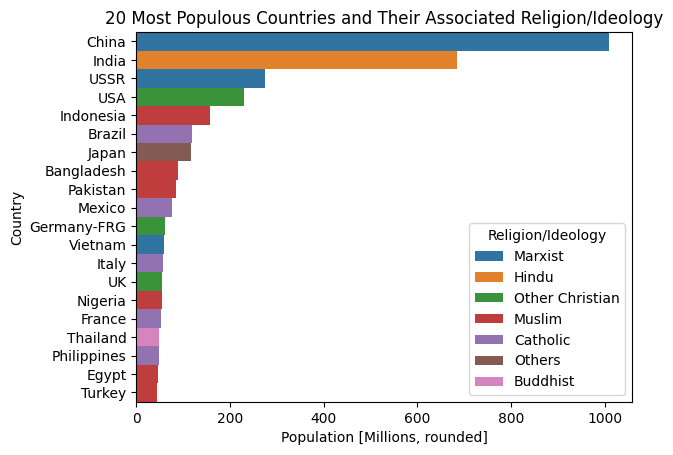

In [3]:
# Plot features

plot_n: int = 20

plot_df = flags_raw_df.copy()
plot_df.sort_values("population", axis=0, inplace=True, ascending=False)
plot_df["religion"] = plot_df["religion"].replace(religions)

pop_rel_fig, pop_rel_ax = plt.subplots()

sns.barplot(plot_df.head(n=plot_n), y="name", x="population", hue="religion", ax=pop_rel_ax, width=1.0, dodge=False)
pop_rel_ax.set_xlabel("Population [Millions, rounded]")
pop_rel_ax.set_ylabel("Country")
pop_rel_ax.set_title(f"{plot_n} Most Populous Countries and Their Associated Religion/Ideology")
pop_rel_ax.get_legend().set_title("Religion/Ideology")

#religion_fig.show()



Text(0.5, 1.0, 'Fraction of Flags With Each Main Hue by Religion/Ideology')

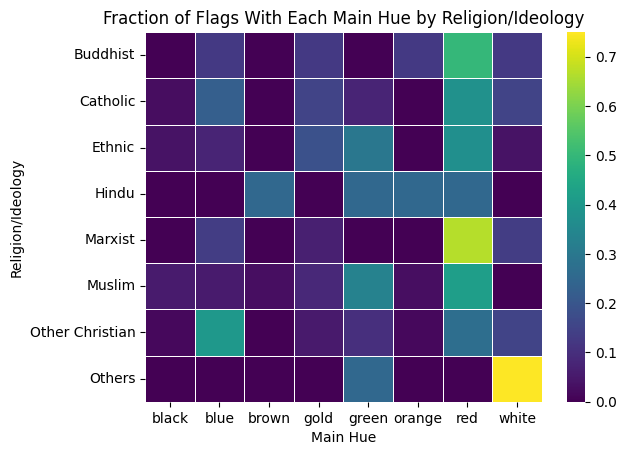

In [4]:

col_rel_fig, col_rel_ax = plt.subplots()

colors = {"red": "#a00", "orange": "#f80", "white": "#aaa", "green": "#0a0", "black": "#000", "blue": "#00a", "gold": "#ff0"}
res = plot_df[["religion", "mainhue"]].groupby(["religion", "mainhue"]).size()
col_rel_df = res.div(res.unstack().sum(axis=1)).unstack(fill_value=0)


sns.heatmap(col_rel_df, ax=col_rel_ax, cmap="viridis", linewidths=0.5)
col_rel_ax.set_xlabel("Main Hue")
col_rel_ax.set_ylabel("Religion/Ideology")
col_rel_ax.set_title("Fraction of Flags With Each Main Hue by Religion/Ideology")

In [5]:
named_df = flags_raw_df
named_df["language"].replace(languages, inplace=True)
named_df["religion"].replace(religions, inplace=True)

In [6]:
to_one_hot: list = ["mainhue", "landmass", "zone", "language", "topleft", "botright"]
one_hot_df = named_df

for col in to_one_hot:
    one_hot_df = pd.get_dummies(data=one_hot_df, columns=[col], prefix=col)


In [7]:
to_normalize: list = ["area", "population", "bars", "stripes", "colours", "circles", "crosses", "saltires", "quarters", "sunstars"]
normalized_df = one_hot_df
unscaled_df = one_hot_df.copy()
for col in to_normalize:
    normalized_df[col] = normalized_df[col].div(normalized_df[col].max())



In [8]:
normalized_df

,name,area,population,bars,stripes,colours,red,green,blue,gold,...,language_Arabic,language_Chinese,language_English,language_French,language_German,language_Japanese/Turkish/Finnish/Magyar,language_Other Indo-European,language_Others,language_Slavic,language_Spanish
0,Afghanistan,0.028926,0.015873,0.0,0.214286,0.625,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,Albania,0.001295,0.002976,0.0,0.000000,0.375,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,Algeria,0.106598,0.019841,0.4,0.000000,0.375,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,American-Samoa,0.000000,0.000000,0.0,0.000000,0.625,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,0.000000,0.000000,0.6,0.000000,0.375,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,0.000134,0.000000,0.0,0.000000,0.375,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
190,Yugoslavia,0.011428,0.021825,0.0,0.214286,0.500,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
191,Zaire,0.040398,0.027778,0.0,0.000000,0.500,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
192,Zambia,0.033613,0.005952,0.6,0.000000,0.500,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
